<a href="https://colab.research.google.com/github/A-S-Vignesh-Raja/Aid-Distribution-Tracker/blob/main/Aid_Distribution_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [ ]:
#loading the dataset to pandas dataframe
aid_dataset = pd.read_csv('/content/aid_database.csv')

In [ ]:
#for finding number of rows and colums
aid_dataset.shape

(1599, 12)

In [ ]:
#for finding 5 rows
aid_dataset.head()


,population_density,aid_amount(lakhs),% for_women_and_children,% allocated_for_old_citizens,% for_disabled_citzens,impact_magnitude(/10),supply_kits(in thousands),Challenges_Index(*2)/5,death( *1000),aid_provided (*5),demand_score( /5),distribution_status
0,0.9978,7.4,11.0,9.4,0.00,1.9,34.0,0.70,0.076,0.56,3.51,5
1,0.9968,7.8,25.0,9.8,0.00,2.6,67.0,0.88,0.098,0.68,3.20,5
2,0.9970,7.8,15.0,9.8,0.04,2.3,54.0,0.76,0.092,0.65,3.26,5
3,0.9980,11.2,17.0,9.8,0.56,1.9,60.0,0.28,0.075,0.58,3.16,6
4,0.9978,7.4,11.0,9.4,0.00,1.9,34.0,0.70,0.076,0.56,3.51,5


In [ ]:
#to check for missing values in the dataset
aid_dataset.isnull().sum()

population_density              0
aid_amount(lakhs)               0
% for_women_and_children        0
% allocated_for_old_citizens    0
% for_disabled_citzens          0
impact_magnitude(/10)           0
supply_kits(in thousands)       0
Challenges_Index(*2)/5          0
death( *1000)                   0
aid_provided (*5)               0
demand_score( /5)               0
distribution_status             0
dtype: int64

In [ ]:

#statistical measures of the dataset
aid_dataset.describe()


,population_density,aid_amount(lakhs),% for_women_and_children,% allocated_for_old_citizens,% for_disabled_citzens,impact_magnitude(/10),supply_kits(in thousands),Challenges_Index(*2)/5,death( *1000),aid_provided (*5),demand_score( /5),distribution_status
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.996747,8.319637,15.874922,10.422983,0.270976,2.538806,46.467792,0.527821,0.087467,0.658149,3.311113,5.636023
std,0.001887,1.741096,10.460157,1.065668,0.194801,1.409928,32.895324,0.179060,0.047065,0.169507,0.154386,0.807569
min,0.990070,4.600000,1.000000,8.400000,0.000000,0.900000,6.000000,0.120000,0.012000,0.330000,2.740000,3.000000
25%,0.995600,7.100000,7.000000,9.500000,0.090000,1.900000,22.000000,0.390000,0.070000,0.550000,3.210000,5.000000
50%,0.996750,7.900000,14.000000,10.200000,0.260000,2.200000,38.000000,0.520000,0.079000,0.620000,3.310000,6.000000
75%,0.997835,9.200000,21.000000,11.100000,0.420000,2.600000,62.000000,0.640000,0.090000,0.730000,3.400000,6.000000
max,1.003690,15.900000,72.000000,14.900000,1.000000,15.500000,289.000000,1.580000,0.611000,2.000000,4.010000,8.000000


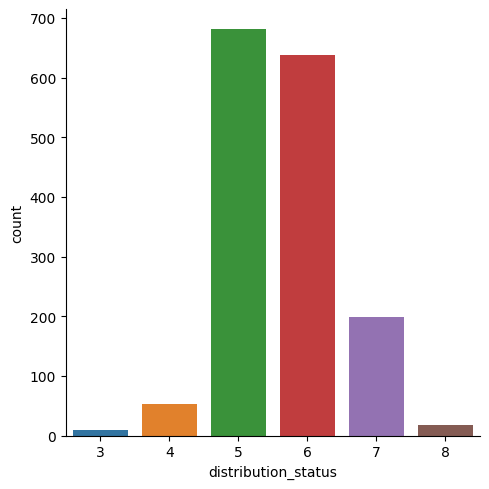

In [ ]:
#Number of quality for each dataset
sns.catplot(x ='distribution_status',data=aid_dataset,kind='count')

<Axes: xlabel='distribution_status', ylabel='Challenges_Index(*2)/5'>

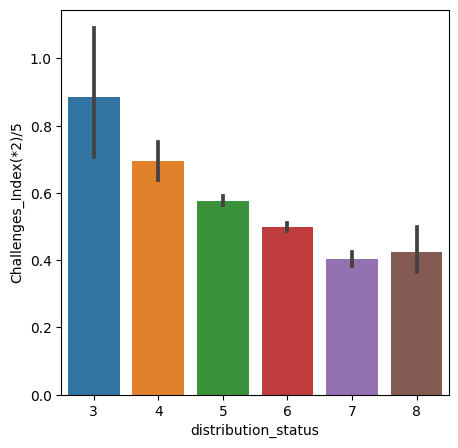

In [ ]:
#to compare parameters
#volatile acidity vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='Challenges_Index(*2)/5',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='% for_disabled_citzens'>

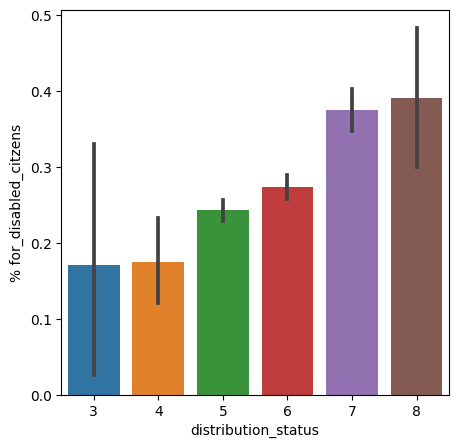

In [ ]:
#citric acid vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='% for_disabled_citzens',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='impact_magnitude(/10)'>

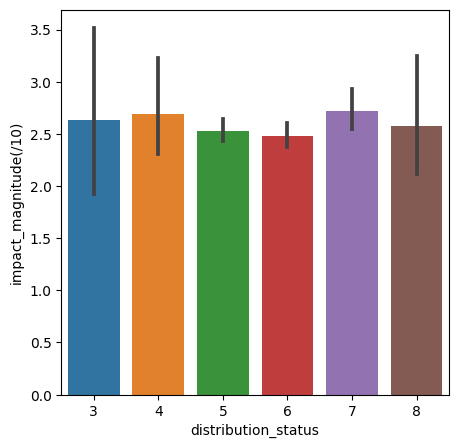

In [ ]:
#residual sugar	 vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='impact_magnitude(/10)',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='death( *1000)'>

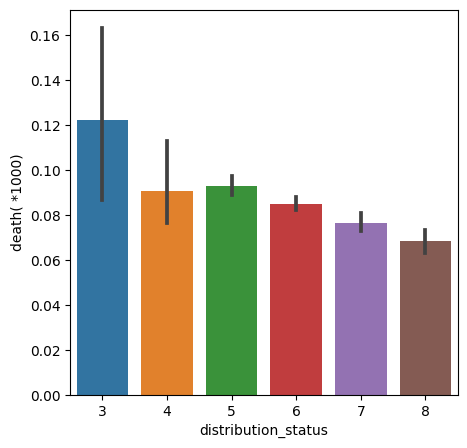

In [ ]:
#chlorides vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='death( *1000)',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='% for_women_and_children'>

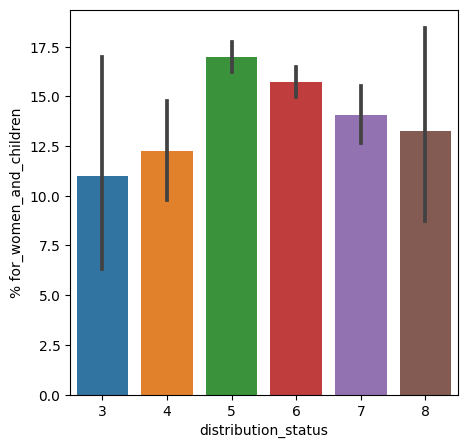

In [ ]:
#free sulfur dioxide vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='% for_women_and_children',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='supply_kits(in thousands)'>

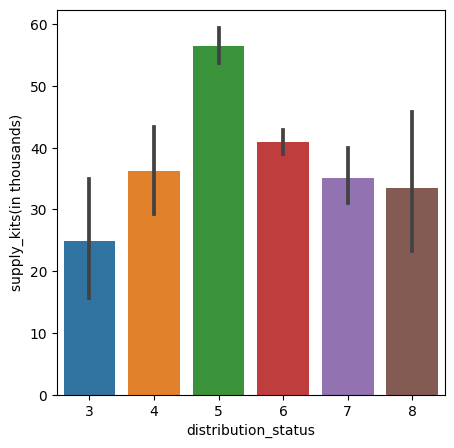

In [ ]:
#total sulfur dioxide vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='supply_kits(in thousands)',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='population_density'>

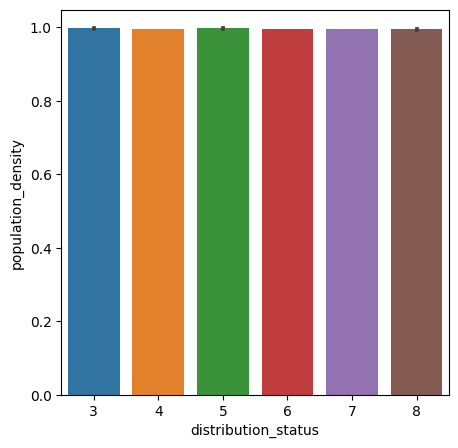

In [ ]:
#density vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='population_density',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='demand_score( /5)'>

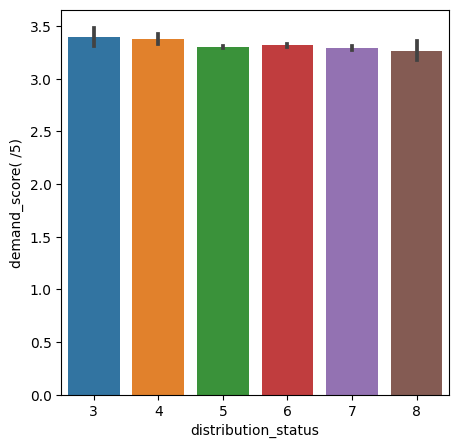

In [ ]:
#pH vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='demand_score( /5)',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='aid_provided (*5)'>

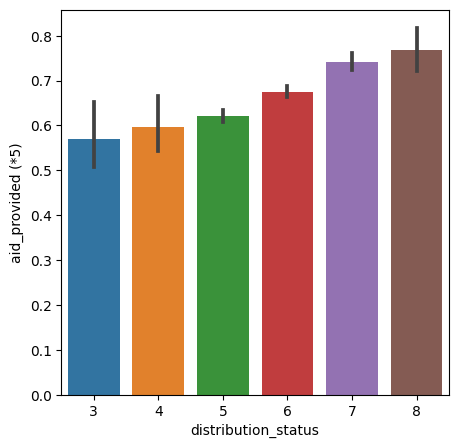

In [ ]:
#sulphates vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='aid_provided (*5)',data = aid_dataset)

<Axes: xlabel='distribution_status', ylabel='% allocated_for_old_citizens'>

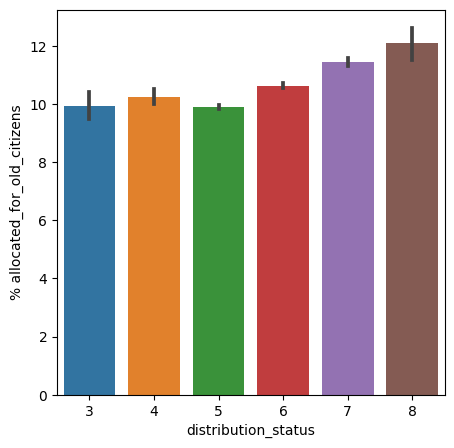

In [ ]:
#alcohol vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x ='distribution_status',y ='% allocated_for_old_citizens',data = aid_dataset)

In [ ]:
#to find correlation between data
correlation = aid_dataset.corr()


<Axes: >

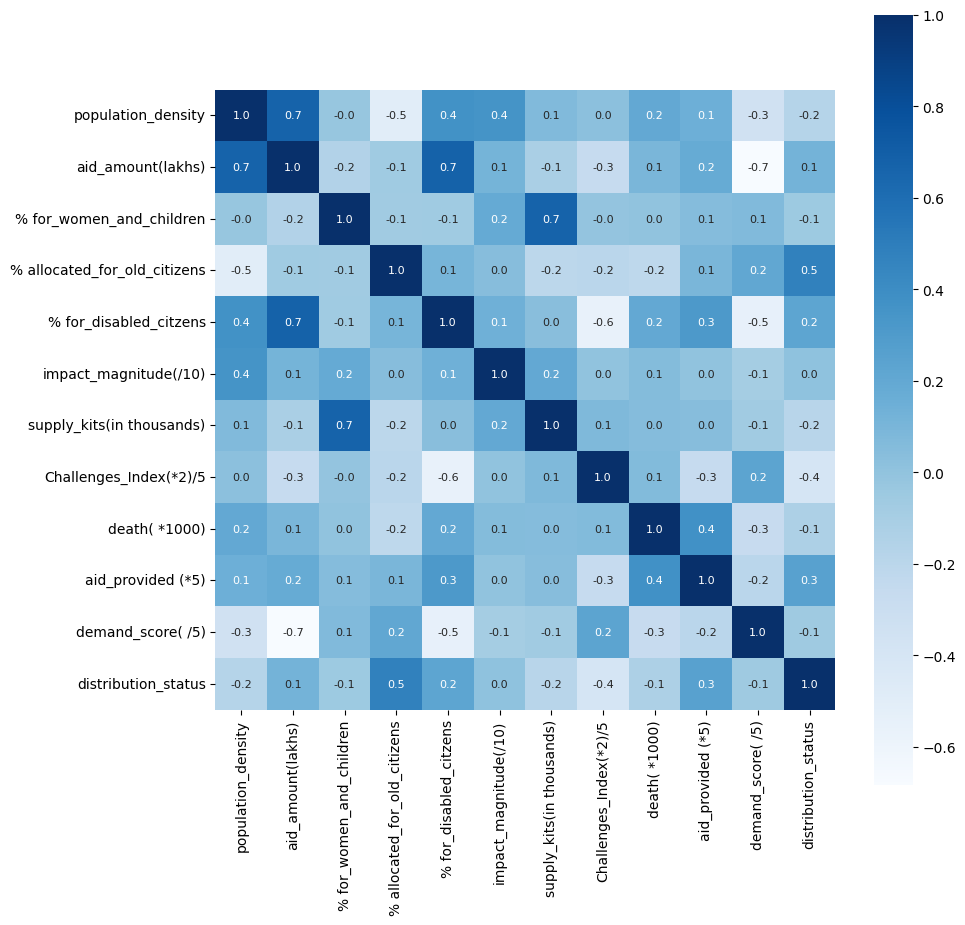

In [ ]:
# Construction of heatmap for understanding the dataset
plt.figure(figsize=(10,10))
sns.heatmap(correlation ,cbar = 'True',square = 'True',fmt ='.1f',annot = True,annot_kws={'size':8},cmap = 'Blues')

In [ ]:
# seperate the data and label
X = aid_dataset.drop('distribution_status',axis = 1)

In [ ]:
print(X)

      population_density  aid_amount(lakhs)  % for_women_and_children  \
0                0.99780                7.4                      11.0   
1                0.99680                7.8                      25.0   
2                0.99700                7.8                      15.0   
3                0.99800               11.2                      17.0   
4                0.99780                7.4                      11.0   
...                  ...                ...                       ...   
1594             0.99490                6.2                      32.0   
1595             0.99512                5.9                      39.0   
1596             0.99574                6.3                      29.0   
1597             0.99547                5.9                      32.0   
1598             0.99549                6.0                      18.0   

      % allocated_for_old_citizens  % for_disabled_citzens  \
0                              9.4                    0.00   

Label Binarization


In [ ]:
#binarization of the given dataset
Y = aid_dataset['distribution_status'].apply(lambda y_value:1 if y_value>=7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: distribution_status, Length: 1599, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=3)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training

RandomForest Classifier

In [ ]:
model = RandomForestClassifier()


In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [ ]:
# accuracy of test dataset
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy :',test_data_accuracy)

Accuracy : 0.928125


Building a predictive system

In [ ]:
input_data = (6.7,0.675,0.07,2.4,0.08900000000000001,17.0,82.0,0.9958,3.35,0.54,2.1)

#changing the data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the data for only one value
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 1):
  print("Aid Distribution Sufficient")
else :
  print("Aid Distribution Not Sufficient")

[0]
Aid Distribution Not Sufficient


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (4.2,0.111,0.37,5.4,0.7,27.0,12.0,0.3258,2.35,1.54,10.2)

#changing the data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the data for only one value
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 1):
  print("Aid Distribution Sufficient")
else :
  print("Aid Distribution Not Sufficient")

[0]
Aid Distribution Sufficient


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
